sat
[y_1_1 = -6,
 x_0_1 = 2,
 y_3_2 = 31,
 x_4_2 = -17,
 y_6_1 = 5,
 x_4_1 = -18,
 x_3_1 = 3,
 y_4_2 = -10,
 y_2_1 = -9,
 x_5_2 = -18,
 x_2_1 = -15,
 y_2_2 = -8,
 x_2_2 = -16,
 x_6_1 = -16,
 y_0_2 = 0,
 x_0_2 = 1,
 x_1_2 = -14,
 y_3_1 = 1,
 y_5_1 = 7,
 x_5_1 = 1,
 y_4_1 = 0,
 y_6_2 = -11,
 y_5_2 = 32,
 x_3_2 = 2,
 x_6_2 = -19,
 x_1_1 = -13,
 y_0_1 = -5,
 y_1_2 = -7,
 y_4_3 = 30,
 x_5_0 = 0,
 y_2_0 = 2,
 y_3_0 = 3,
 y_1_3 = 30,
 y_6_0 = 6,
 x_3_0 = 0,
 x_1_3 = 31,
 y_6_3 = 30,
 y_4_0 = 4,
 x_2_3 = 32,
 x_5_3 = 35,
 x_3_3 = 33,
 x_2_0 = 0,
 x_1_0 = 0,
 x_4_0 = 0,
 y_3_3 = 30,
 y_5_0 = 5,
 x_0_0 = 0,
 x_6_3 = 36,
 y_2_3 = 30,
 x_6_0 = 0,
 x_0_3 = 30,
 x_4_3 = 34,
 y_5_3 = 30,
 y_0_0 = 0,
 y_0_3 = 30,
 y_1_0 = 1]


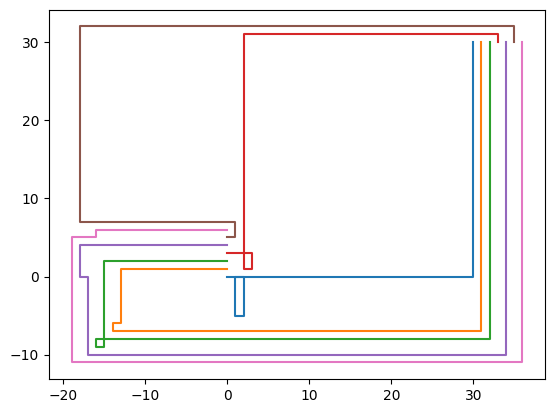

In [13]:
from matplotlib import pyplot as plt

import z3
z3.set_param("parallel.enable", "true")

def Abs(x):
    return z3.If(x >= 0,x,-x)

def Max(x, y):
    return z3.If(x>=y, x, y)

def Min(x, y):
    return z3.If(x<=y, x, y)

def collision(xa1, xa2, ya, xb, yb1, yb2):
    return z3.Or(xb < Min(xa1,xa2) , xb > Max(xa1,xa2) , ya < Min(yb1,yb2) , ya > Max(yb1,yb2))

def make_sig(x, y, n=4):
    return [(x[int(i/2)],x[int(i/2+1)],y[int(i/2)]) if i%2==0 else (x[int(i/2+0.5)],y[int(i/2)],y[int(i/2+0.5)]) for i in range(n)]

def collision_model(sig1, sig2):
    l = []
    for i1, s1 in enumerate(sig1):
        for i2, s2 in enumerate(sig2):
            if i1 % 2 == 0:
                if i2 % 2 == 1:
                    l.append(collision(s1[0], s1[1], s1[2], s2[0], s2[1], s2[2]))
            if i1 % 2 == 1:
                if i2 % 2 == 0:
                    l.append(collision(s2[0], s2[1], s2[2], s1[0], s1[1], s1[2]))
    return l

def declare_all_signals(nbr_sigs, nbr_segms):
    return [[[z3.Int(f"x_{k}_{i}"), z3.Int(f"y_{k}_{i}")] for i in range(nbr_segms)] for k in range(nbr_sigs)]

def make_all_signals(s):
    return [make_sig([x[0] for x in e], [y[1] for y in e], int(2*len(e)-2)) for e in s]

def sigs2plot(m, pts):
    xv = [[m[e[0]].as_long() for e in p if m[e[0]] is not None] for p in pts]
    yv = [[m[e[1]].as_long() for e in p if m[e[1]] is not None] for p in pts]
    v = [[(xv[k][int(i/2+0.5)], yv[k][int(i/2)]) for i in range(len(xv[k])+len(yv[k])-1)] for k in range(len(xv))]
    return [h for g in [[*zip(*f)] for f in v] for h in g]

def make_all_collisions(sigs):
    return [e for i in range(len(sigs)) for k in range(len(sigs)) for e in collision_model(sigs[i],sigs[k]) if i != k]
    

s = z3.Solver()



pts = declare_all_signals(7, 4)



sigs = make_all_signals(pts)

s.add(make_all_collisions(sigs))

for k in pts:
    for l in k:
        for m in l:
            s.add(m > -20)
            s.add(m < 50)
        
for i in range(len(pts)):
    s.add(pts[i][0][0] == 0)
    s.add(pts[i][0][1] == i)
    s.add(pts[i][-1][0] == 30+i)
    s.add(pts[i][-1][1] == 30)


print(s.check())
m = s.model()
print(m)


plt.plot(*sigs2plot(m,pts))

plt.show()

